# Classifier

In [27]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

import statistics

import matplotlib.pyplot as plt

### Import Features

In [3]:
features_df = pd.read_csv('features.csv', index_col=0)

In [4]:
features_df['grid']

0        1
1        1
2        1
3        1
4        1
        ..
9956    10
9957    10
9958    10
9959    10
9960    10
Name: grid, Length: 9961, dtype: int64

In [5]:
features_df.columns

Index(['grid', '1_num_packets', '2_out_fraction', '2_in_fraction',
       '3_src_order_mean', '3_src_order_std', '3_dst_order_mean',
       '3_dst_order_std', '4_outgoing_conc_mean', '4_outgoing_conc_median',
       '4_outgoing_conc_max', '4_outgoing_conc_std', '5_first_fraction_src',
       '5_last_fraction_src', '5_first_fraction_dst', '5_last_fraction_dst',
       '6_packets_ps', '7_ia_total_mean', '7_ia_total_max', '7_ia_total_std',
       '7_ia_total_tq', '7_ia_src_mean', '7_ia_src_max', '7_ia_src_std',
       '7_ia_src_tq', '7_ia_dst_mean', '7_ia_dst_max', '7_ia_dst_std',
       '7_ia_dst_tq', '8_total_len_mean', '8_total_len_median',
       '8_total_len_min', '8_total_len_max', '8_total_len_std',
       '8_src_len_mean', '8_src_len_median', '8_src_len_min', '8_src_len_max',
       '8_src_len_std', '8_dst_len_mean', '8_dst_len_median', '8_dst_len_min',
       '8_dst_len_max', '8_dst_len_std'],
      dtype='object')

In [6]:
features_df.dtypes

grid                        int64
1_num_packets               int64
2_out_fraction            float64
2_in_fraction             float64
3_src_order_mean          float64
3_src_order_std           float64
3_dst_order_mean          float64
3_dst_order_std           float64
4_outgoing_conc_mean      float64
4_outgoing_conc_median    float64
4_outgoing_conc_max         int64
4_outgoing_conc_std       float64
5_first_fraction_src      float64
5_last_fraction_src       float64
5_first_fraction_dst      float64
5_last_fraction_dst       float64
6_packets_ps              float64
7_ia_total_mean           float64
7_ia_total_max            float64
7_ia_total_std            float64
7_ia_total_tq             float64
7_ia_src_mean             float64
7_ia_src_max              float64
7_ia_src_std              float64
7_ia_src_tq               float64
7_ia_dst_mean             float64
7_ia_dst_max              float64
7_ia_dst_std              float64
7_ia_dst_tq               float64
8_total_len_me

### Classifier

In [7]:
features_df['grid'].to_numpy().tolist()

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


#### Obtain features, labels

In [8]:
def load_data(features_df):

    """Function to load data that will be used for classification.

    Args:
        You can provide the args you want.
    Returns:
        features (list): the list of features you extract from every trace
        labels (list): the list of identifiers for each trace
    
    An example: Assume you have traces (trace1...traceN) for cells with IDs in the
    range 1-N.  
    
    You extract a list of features from each trace:
    features_trace1 = [f11, f12, ...]
    .
    .
    features_traceN = [fN1, fN2, ...]

    Your inputs to the classifier will be:

    features = [features_trace1, ..., features_traceN]
    labels = [1, ..., N]

    Note: You will have to decide what features/labels you want to use and implement 
    feature extraction on your own.
    """

    ###############################################
    # TODO: Complete this function. 
    ###############################################

    features = features_df.loc[:, features_df.columns != 'grid'].to_numpy().tolist()
    labels = features_df['grid'].to_numpy().tolist()

    return features, labels

In [9]:
features, labels = load_data(features_df)

In [10]:
features

[[578.0,
  0.5,
  0.5,
  1.0,
  0.0,
  1.0,
  0.0,
  10.0,
  10.0,
  10.0,
  0.0,
  0.5,
  0.5,
  0.5,
  0.5,
  43.98796069302804,
  0.0457801289198606,
  0.788928,
  0.1264752948182909,
  0.0070715,
  0.103403,
  0.78981,
  0.1752201061821172,
  0.078932,
  0.0831154556962025,
  0.788928,
  0.161217582396523,
  0.044723,
  1706.7058823529412,
  576.0,
  40.0,
  16960.0,
  3020.6956874180755,
  1706.7058823529412,
  576.0,
  40.0,
  16960.0,
  3020.6956874180755,
  1706.7058823529412,
  576.0,
  40.0,
  16960.0,
  3020.6956874180755],
 [486.0,
  0.5,
  0.5,
  1.0,
  0.0,
  1.0,
  0.0,
  10.0,
  10.0,
  10.0,
  0.0,
  0.5,
  0.5,
  0.5,
  0.5,
  44.09293845487816,
  0.0543927966804979,
  0.655548,
  0.1415928926293309,
  0.007644,
  0.1202543119266055,
  0.656177,
  0.1935567118464296,
  0.090222,
  0.100817623076923,
  0.655548,
  0.1807423613891103,
  0.0675375,
  1787.7695473251028,
  576.0,
  40.0,
  18580.0,
  3266.634700709465,
  1787.7695473251028,
  576.0,
  40.0,
  18580.0,
  3

In [11]:
labels

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


#### Perform Cross Validation

In [35]:
def classify(train_features, train_labels, test_features, test_labels):

    """Function to perform classification, using a 
    Random Forest. 

    Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
    
    Args:
        train_features (numpy array): list of features used to train the classifier
        train_labels (numpy array): list of labels used to train the classifier
        test_features (numpy array): list of features used to test the classifier
        test_labels (numpy array): list of labels (ground truth) of the test dataset

    Returns:
        predictions: list of labels predicted by the classifier for test_features

    Note: You are free to make changes the parameters of the RandomForestClassifier().
    """

    # Initialize a random forest classifier. Change parameters if desired.
    clf = RandomForestClassifier()
    # Train the classifier using the training features and labels.
    clf.fit(train_features, train_labels)
    # Use the classifier to make predictions on the test features.
    predictions = clf.predict(test_features)
    
    importances = clf.feature_importances_
    std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
    forest_importances = pd.Series(importances, index=features_df.columns[1:].to_numpy())

    
    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
    
    
    return predictions

In [36]:
def perform_crossval(features, labels, folds=10):

    """Function to perform cross-validation.
    Args:
        features (list): list of features
        labels (list): list of labels
        folds (int): number of fold for cross-validation (default=10)
    Returns:
        You can modify this as you like.
    
    This function splits the data into training and test sets. It feeds
    the sets into the classify() function for each fold. 

    You need to use the data returned by classify() over all folds 
    to evaluate the performance.         
    """

    kf = StratifiedKFold(n_splits=folds)
    labels = np.array(labels)
    features = np.array(features)

    accuracy = []
    for train_index, test_index in kf.split(features, labels):
        X_train, X_test = features[train_index], features[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        predictions = classify(X_train, y_train, X_test, y_test)
        
        # Determine accuracy of each fold
        num_correct = 0
        for i in range(0, len(y_test)):
            if (y_test[i] == predictions[i]):
                num_correct+=1
        
        this_accuracy = num_correct / len(predictions)
        accuracy.append(this_accuracy)
        

    ###############################################
    # TODO: Write code to evaluate the performance of your classifier
    ###############################################
    total_accuracy = statistics.mean(accuracy)
    print(f"The total accuracy of the classifier is: {total_accuracy}")
    
    

The total accuracy of the classifier is: 0.17809392031516236


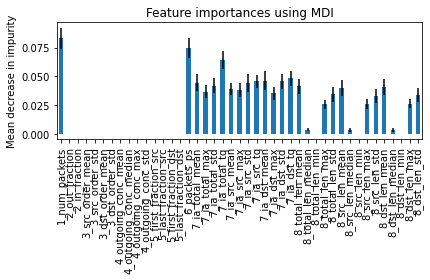

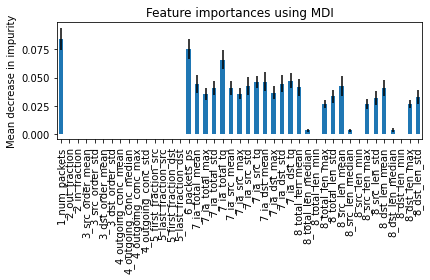

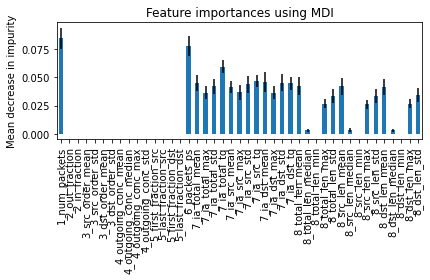

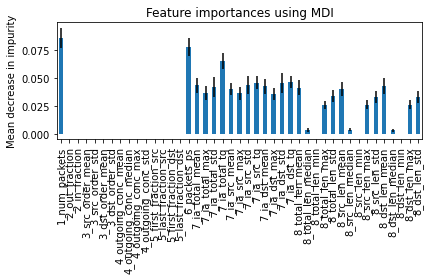

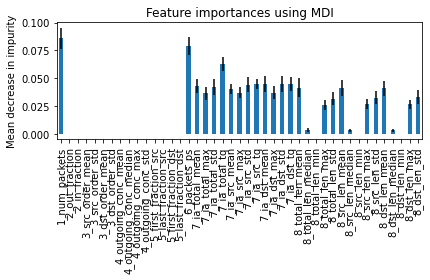

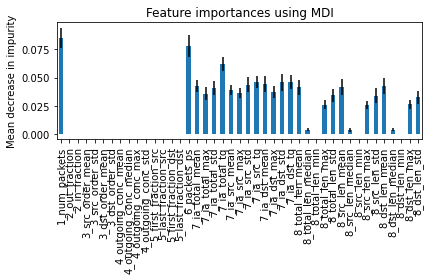

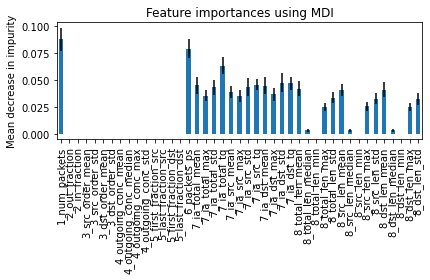

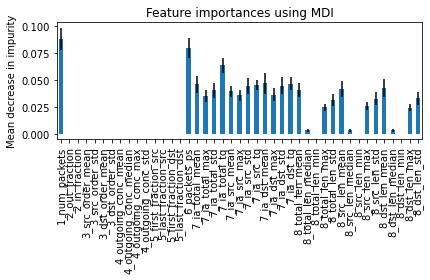

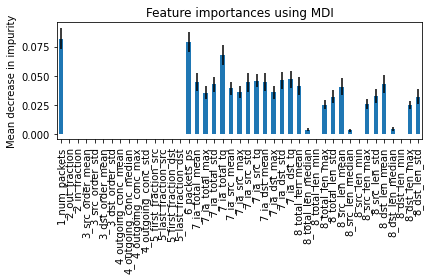

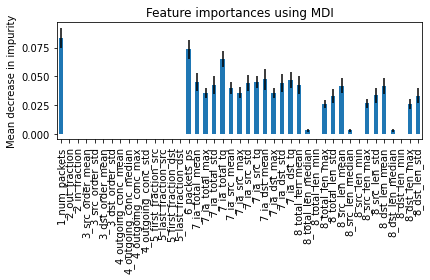

In [37]:
perform_crossval(features, labels, folds=10)

In [15]:
def main():

    """Please complete this skeleton to implement cell fingerprinting.
    This skeleton provides the code to perform classification 
    using a Random Forest classifier. You are free to modify the 
    provided functions as you wish.

    Read about random forests: https://towardsdatascience.com/understanding-random-forest-58381e0602d2
    """

    features, labels = load_data()
    perform_crossval(features, labels, folds=10)